<a href="https://colab.research.google.com/github/st4302/Machine_Learning_Final_Project/blob/main/Machine_Learning_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.spatial import distance_matrix

In [ ]:
#Loading WISC Dataset as a pandas dataframe
url = 'https://raw.githubusercontent.com/rv692/ml2020/main/wisc_data.csv?token=AHSEG2INQWGFYRR7XVVIYM27Z3NRK'

wisc_df = pd.read_csv(url)

In [ ]:
#size of dataframe
wisc_df.shape

(569, 32)

In [ ]:
#viewing dataframe
wisc_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,862722,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.000000,0.1930,0.07818,0.2241,1.5080,1.553,9.833,0.010190,0.010840,0.00000,0.000000,0.02659,0.004100,7.930,19.54,50.41,185.2,0.15840,0.12020,0.0000,0.00000,0.2932,0.09382
1,921362,B,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.013640,0.2037,0.07751,0.2196,1.4790,1.445,11.730,0.015470,0.064570,0.09252,0.013640,0.02105,0.007551,8.678,31.89,54.49,223.6,0.15960,0.30640,0.3393,0.05000,0.2790,0.10660
2,921092,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.000000,0.1870,0.07285,0.3777,1.4620,2.492,19.140,0.012660,0.009692,0.00000,0.000000,0.02882,0.006872,9.077,30.92,57.17,248.0,0.12560,0.08340,0.0000,0.00000,0.3058,0.09938
3,92751,B,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.000000,0.1587,0.05884,0.3857,1.4280,2.548,19.150,0.007189,0.004660,0.00000,0.000000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039
4,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.0688,0.02564,0.3105,0.07409


In [ ]:
#checking for null values
wisc_df.isnull().sum().sum()

0

In [ ]:
# Cleaning and modifying the data - dropping the ID column
wisc_df = wisc_df.drop('id',axis=1)

In [ ]:
wisc_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.000000,0.1930,0.07818,0.2241,1.5080,1.553,9.833,0.010190,0.010840,0.00000,0.000000,0.02659,0.004100,7.930,19.54,50.41,185.2,0.15840,0.12020,0.0000,0.00000,0.2932,0.09382
1,B,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.013640,0.2037,0.07751,0.2196,1.4790,1.445,11.730,0.015470,0.064570,0.09252,0.013640,0.02105,0.007551,8.678,31.89,54.49,223.6,0.15960,0.30640,0.3393,0.05000,0.2790,0.10660
2,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.000000,0.1870,0.07285,0.3777,1.4620,2.492,19.140,0.012660,0.009692,0.00000,0.000000,0.02882,0.006872,9.077,30.92,57.17,248.0,0.12560,0.08340,0.0000,0.00000,0.3058,0.09938
3,B,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.000000,0.1587,0.05884,0.3857,1.4280,2.548,19.150,0.007189,0.004660,0.00000,0.000000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039
4,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.0688,0.02564,0.3105,0.07409


In [ ]:
wisc_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


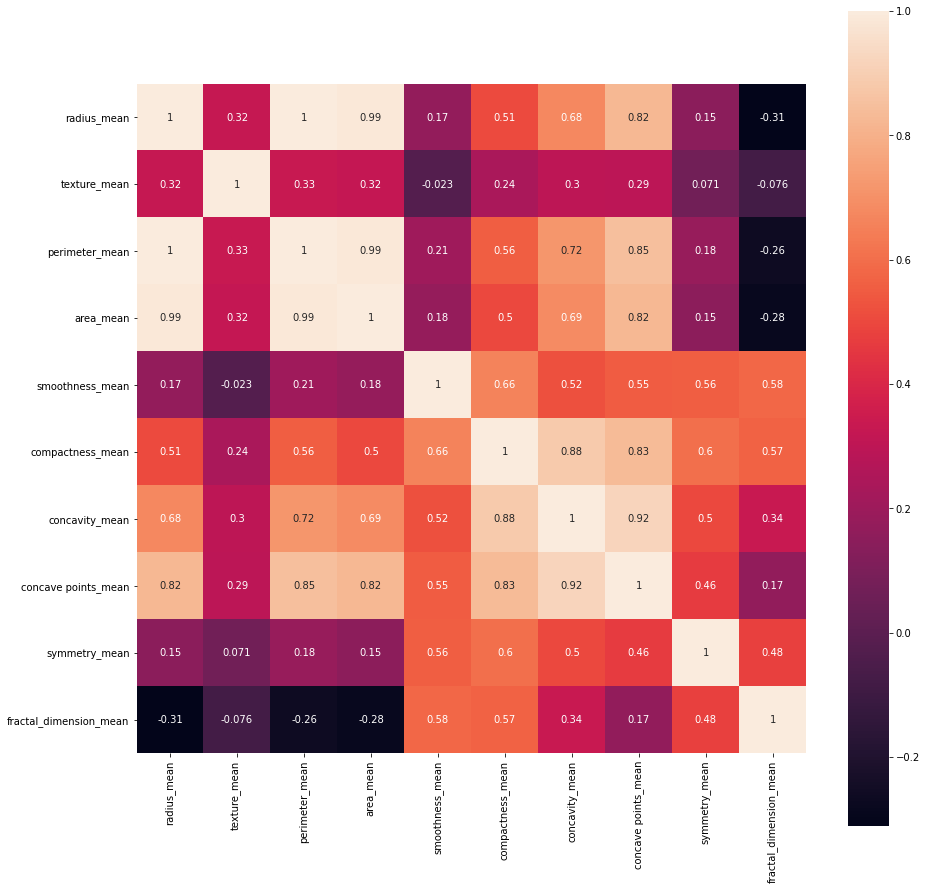

In [ ]:
#Heatmap to just visualize - is this needed?
features_mean = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
plt.figure(figsize=(15,15))
heat = sns.heatmap(wisc_df[features_mean].corr(), vmax=1, square=True, annot=True)

In [ ]:
# Set the diagnosis column as index because it was giving me issues with standardization and PCA
wisc_df_id=wisc_df.set_index('diagnosis')

In [ ]:
wisc_df_id.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.000000,0.1930,0.07818,0.2241,1.5080,1.553,9.833,0.010190,0.010840,0.00000,0.000000,0.02659,0.004100,7.930,19.54,50.41,185.2,0.15840,0.12020,0.0000,0.00000,0.2932,0.09382
B,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.013640,0.2037,0.07751,0.2196,1.4790,1.445,11.730,0.015470,0.064570,0.09252,0.013640,0.02105,0.007551,8.678,31.89,54.49,223.6,0.15960,0.30640,0.3393,0.05000,0.2790,0.10660
B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.000000,0.1870,0.07285,0.3777,1.4620,2.492,19.140,0.012660,0.009692,0.00000,0.000000,0.02882,0.006872,9.077,30.92,57.17,248.0,0.12560,0.08340,0.0000,0.00000,0.3058,0.09938
B,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.000000,0.1587,0.05884,0.3857,1.4280,2.548,19.150,0.007189,0.004660,0.00000,0.000000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039
B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.0688,0.02564,0.3105,0.07409


In [ ]:
#Standardize the dataframe
scaled=StandardScaler().fit_transform(wisc_df_id)
scaled

array([[-2.0296483 , -1.36357954, -1.98450403, ..., -1.74506282,
         0.0505464 ,  0.54718591],
       [-1.82799822,  1.43122808, -1.79708862, ..., -0.98373295,
        -0.17917844,  1.25540006],
       [-1.81720569,  1.44286341, -1.81191709, ..., -1.74506282,
         0.25438676,  0.85529786],
       ...,
       [ 3.71851501,  0.60046511,  3.71251256, ...,  2.34784656,
        -0.07240492, -0.17321972],
       [ 3.77531785,  1.62437465,  3.91022552, ...,  2.251919  ,
        -0.42022775, -0.53619332],
       [ 3.97128765, -0.19073771,  3.97612984, ...,  0.68357946,
        -2.0266839 , -1.59020217]])

In [ ]:
#Dataframe with standardized data
wisc_stand_df = pd.DataFrame(data=scaled, index=wisc_df_id.index, columns=wisc_df_id.columns)
wisc_stand_df


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,-2.029648,-1.363580,-1.984504,-1.454443,1.468835,-0.543168,-1.114873,-1.261820,0.432204,2.180614,-0.653527,0.528240,-0.650005,-0.671142,1.049716,-0.818119,-1.057501,-1.913447,0.732247,0.115403,-1.726901,-0.999409,-1.693361,-1.222423,1.141110,-0.852841,-1.305831,-1.745063,0.050546,0.547186
B,-1.827998,1.431228,-1.797089,-1.377937,-0.688901,0.294866,0.046713,-0.909990,0.822855,2.085634,-0.669769,0.475624,-0.703468,-0.629405,2.809788,2.184826,2.010187,0.299092,0.061472,1.420748,-1.572003,1.011712,-1.571835,-1.154919,1.193713,0.331651,0.321969,-0.983733,-0.179178,1.255400
B,-1.817206,1.442863,-1.811917,-1.354046,-1.094545,-1.052963,-1.114873,-1.261820,0.213147,1.425031,-0.099152,0.444780,-0.185171,-0.466372,1.873083,-0.882280,-1.057501,-1.913447,1.002252,1.163916,-1.489377,0.853754,-1.492009,-1.112026,-0.296707,-1.086940,-1.305831,-1.745063,0.254387,0.855298
B,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,-0.070279,0.383092,-0.157449,-0.466152,0.049342,-1.163516,-1.057501,-1.913447,0.752830,-0.382754,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207
B,-1.684571,-0.570050,-1.658278,-1.288347,-0.737294,-0.851130,-0.915500,-1.109197,-0.155598,0.316465,-0.898232,-0.472008,-0.877224,-0.706961,0.642366,-0.504020,-0.530967,-0.953653,0.629330,-0.458783,-1.512777,-0.605327,-1.489328,-1.122222,-0.116980,-0.754239,-0.975761,-1.354653,0.330422,-0.546168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M,3.150487,1.307894,3.275896,3.478653,0.707364,3.073153,3.077232,3.497170,0.063458,0.711976,1.776193,0.466552,2.235529,1.752720,0.375022,1.757830,0.842397,1.379409,-1.197745,0.793608,2.843411,1.293432,3.110797,2.955784,1.092890,2.247704,1.801046,2.620403,-0.882913,1.172276
M,3.295334,-0.425771,3.387110,3.854074,1.319387,2.500819,3.113641,3.672569,0.527128,-0.225060,2.128091,-0.663965,2.156324,2.480977,-0.224002,0.947432,0.356978,0.532674,0.339952,-0.155047,3.491579,-0.341520,3.635028,4.137101,0.904396,2.159281,1.789052,2.451387,1.276824,0.232978
M,3.718515,0.600465,3.712513,4.536659,0.927977,1.649897,2.489659,3.582290,-0.042419,-0.722639,1.555309,0.479253,1.462291,1.944135,-0.803359,-0.006044,-0.026649,0.099574,-0.580244,-0.396371,3.489508,1.168042,3.381848,4.105459,0.650148,0.948707,1.256047,2.347847,-0.072405,-0.173220


In [ ]:
wisc_stand_df.describe()
#mean is around 0 and std is 1 so standardization worked

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.590176e-16,9.775426e-17,-8.116921e-17,1.170710e-16,-8.468133e-16,-1.192173e-16,4.300407e-16,-1.248757e-17,2.977505e-16,-1.694407e-15,2.154106e-16,-1.747284e-16,-2.497514e-16,-1.030225e-16,-9.365678e-18,2.240933e-16,-1.237050e-16,-1.530703e-16,7.024258e-17,-8.507157e-17,2.903360e-16,-2.497514e-17,1.279976e-16,-3.800904e-16,-1.360950e-15,-5.326729e-17,2.586781e-16,-1.369730e-16,3.551153e-16,-5.806720e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,-1.059924e+00,-1.554264e+00,-1.044049e+00,-7.378291e-01,-1.776065e+00,-1.298098e+00,-1.057501e+00,-1.913447e+00,-1.532890e+00,-1.096968e+00,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,-6.235706e-01,-6.948092e-01,-6.237679e-01,-4.947542e-01,-6.240183e-01,-6.929263e-01,-5.571612e-01,-6.744900e-01,-6.516807e-01,-5.851185e-01,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,-2.922452e-01,-1.974976e-01,-2.866520e-01,-3.477828e-01,-2.203352e-01,-2.810204e-01,-1.990654e-01,-1.404958e-01,-2.194304e-01,-2.299405e-01,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,2.660996e-01,4.665523e-01,2.430307e-01,1.067726e-01,3.683553e-01,3.896541e-01,3.367521e-01,4.726567e-01,3.556925e-01,2.886421e-01,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,8.906909e+00,6.655279e+00,9.461986e+00,1.104184e+01,8.029999e+00,6.143482e+00,1.207268e+01,6.649601e+00,7.071917e+00,9.851593e+00,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


##Splitting into Malignant vs. Benign - prelim group comparison

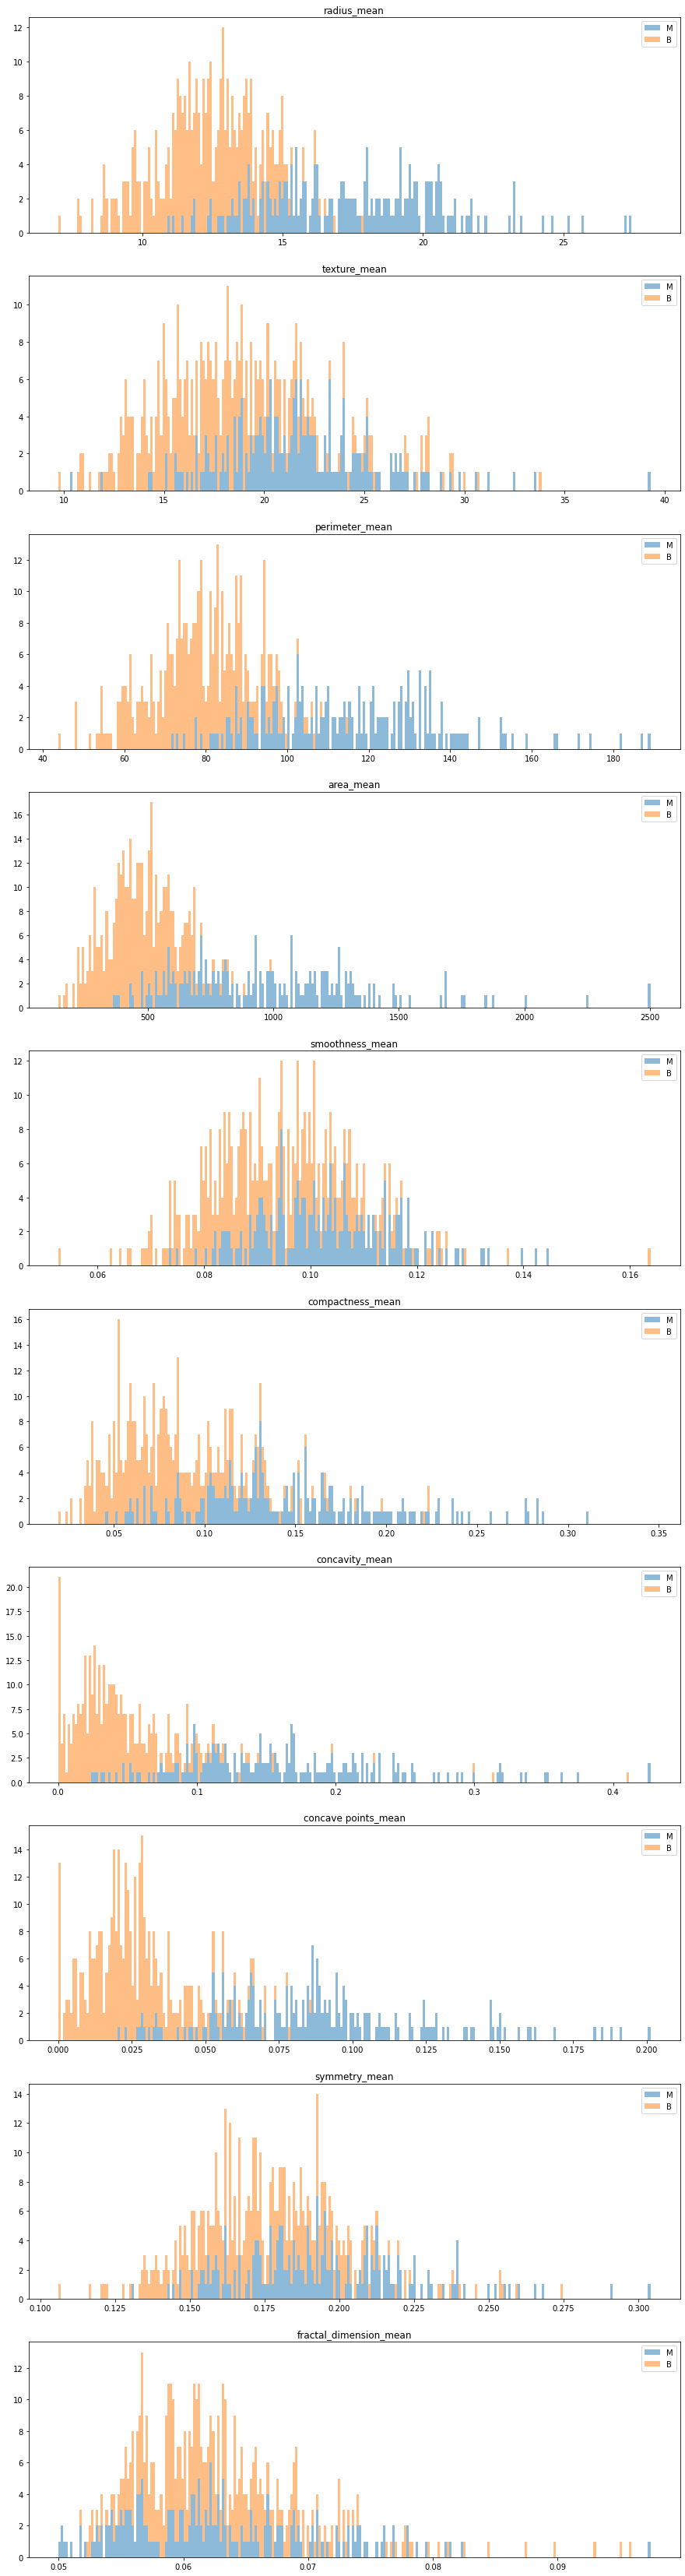

In [ ]:
#Splitting into Malignant vs. Benign
malignant=wisc_df[wisc_df['diagnosis'] =="M"]
benign=wisc_df[wisc_df['diagnosis'] =="B"]
features_mean = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
#Plotting features by feature, separated by type
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(15,60))
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(wisc_df[features_mean[idx]]) - min(wisc_df[features_mean[idx]]))/250
    ax.hist([malignant[features_mean[idx]],benign[features_mean[idx]]], bins=np.arange(min(wisc_df[features_mean[idx]]), max(wisc_df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.show()


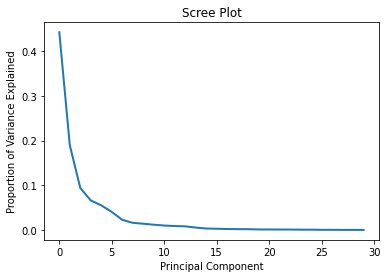

In [ ]:
# PCA scree plot for standardized data using all the components
pca = PCA(n_components=30)
PC = pca.fit_transform(wisc_stand_df)
plt.plot(pca.explained_variance_ratio_,linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

10 components explain aroudn 90% of the proportion variance so we can use that number for the PCA.

Text(0.5, 1.0, 'PCA')

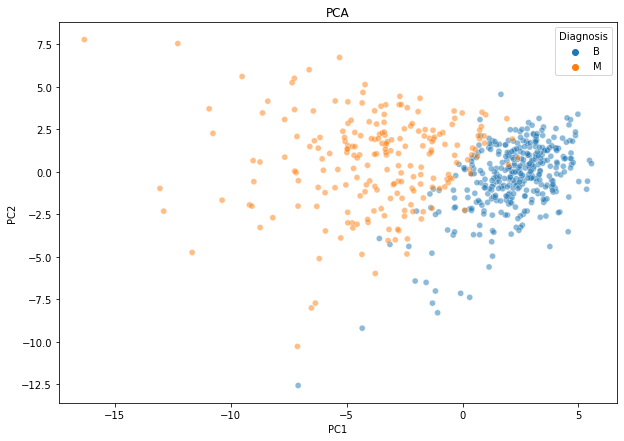

In [ ]:
pca = PCA(n_components=10)
PC = pca.fit_transform(wisc_stand_df)
pc_plot = pd.DataFrame({'PC1': -PC[:,0],
                        'PC2': -PC[:,1],
                        'Diagnosis': wisc_stand_df.index})
plt.figure(figsize=(10,7))
sns.scatterplot(data=pc_plot, x='PC1', y='PC2', hue='Diagnosis', alpha=0.5).set_title('PCA')

In [ ]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

The first two components explain 44% and 19% of varience respectively.


Text(0.5, 1.0, 'PCA')

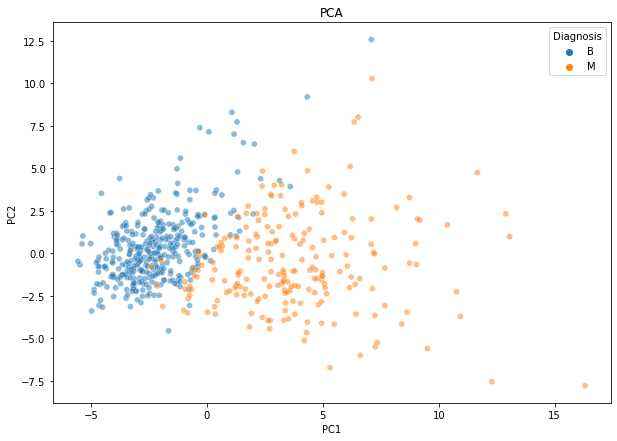

In [ ]:
#PCA of 2 principle components
pcs = pca.fit_transform(wisc_stand_df)
pc_plot = pd.DataFrame({'PC1': pcs[:, 0],
                        'PC2': pcs[:,1],
                        'Diagnosis': wisc_stand_df.index})
plt.figure(figsize=(10,7))
sns.scatterplot(data=pc_plot, x='PC1', y='PC2', hue='Diagnosis', alpha=0.5).set_title('PCA')


In [ ]:
#TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0).fit_transform(wisc_stand_df)

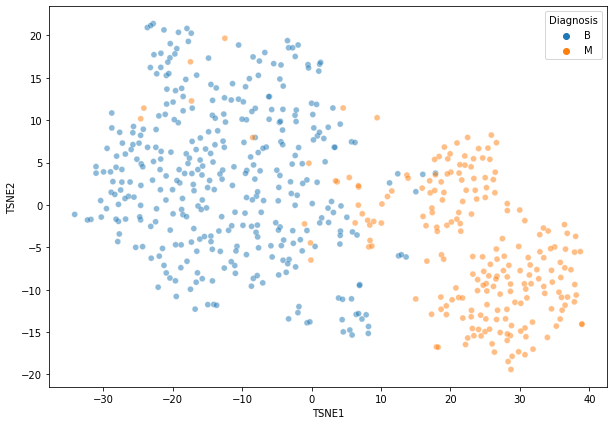

In [ ]:
#TSNE
tsne_plot = pd.DataFrame({'TSNE1': tsne[:, 0],
                          'TSNE2': tsne[:,1],
                          'Diagnosis': wisc_stand_df.index})
plt.figure(figsize=(10,7))
sns.scatterplot(data=tsne_plot, x='TSNE1', y='TSNE2', hue='Diagnosis', alpha=0.5)

In [ ]:
#Create distance matrix
hierarchical_dist = pd.DataFrame(distance_matrix(wisc_stand_df, 
                                                wisc_stand_df), 
                                index=wisc_stand_df.index, 
                                columns=wisc_stand_df.index)

print(hierarchical_dist)

diagnosis          B          B          B  ...          M          M          M
diagnosis                                   ...                                 
B           0.000000   7.262637   4.862037  ...  17.211239  25.441458  24.027692
B           7.262637   0.000000   6.186921  ...  16.449989  24.006954  23.757473
B           4.862037   6.186921   0.000000  ...  16.844533  24.657609  23.415695
B           7.304001   8.707421   4.489175  ...  16.917526  24.789019  23.500920
B           4.003160   6.787322   4.223945  ...  16.228513  24.693589  23.535503
...              ...        ...        ...  ...        ...        ...        ...
M          17.153916  14.951178  16.666159  ...   4.749058  13.497194  16.112476
M          17.498711  16.579248  17.499668  ...   3.833335  12.758660  15.069437
M          17.211239  16.449989  16.844533  ...   0.000000  13.499889  15.690412
M          25.441458  24.006954  24.657609  ...  13.499889   0.000000   8.268542
M          24.027692  23.757

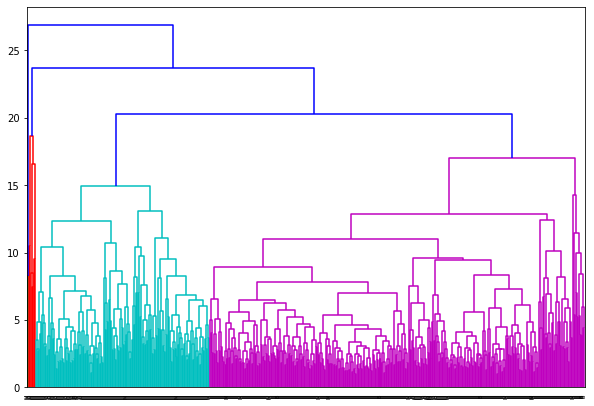

In [ ]:
# Use python function and make dendrogram for complete linkage
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, set_link_color_palette
from matplotlib import pyplot as plt

hierarchical_dist = hierarchical_dist.replace({np.nan: 0})
linked_complete = linkage(wisc_stand_df, method='complete', metric='euclidean')

labelList = hierarchical_dist.index

plt.figure(figsize=(10, 7))
dendrogram(linked_complete,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Cut the tree for complete linkage
cuttree_complete = np.squeeze(cut_tree(linked_complete, n_clusters=2))
print(dict(zip(labelList.tolist(), cuttree_complete)))

{'B': 0, 'M': 1}


In [ ]:
# Contingency table for complete linkage
pd.crosstab(index = wisc_stand_df.index, 
            columns = cuttree_complete, 
            rownames = ['Samples'], 
            colnames = ['Cluster'])

Cluster,0,1
Samples,,
B,357,0
M,210,2


In [ ]:
# Cut the tree for complete linkage
cuttree_complete = np.squeeze(cut_tree(linked_complete, n_clusters=5))
print(dict(zip(labelList.tolist(), cuttree_complete)))

{'B': 0, 'M': 4}


In [ ]:
# Contingency table for complete linkage
pd.crosstab(index = wisc_stand_df.index, 
            columns = cuttree_complete, 
            rownames = ['Samples'], 
            colnames = ['Cluster'])

Cluster,0,1,2,3,4
Samples,,,,,
B,343,2,12,0,0
M,40,0,165,5,2


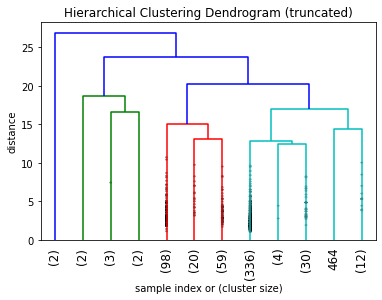

In [ ]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    linked_complete,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

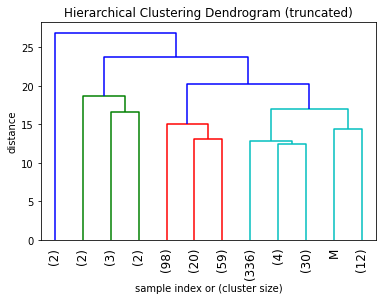

In [ ]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    linked_complete,
    orientation='top',
    labels=labelList,
    distance_sort='descending',
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    #show_contracted=True,
    show_leaf_counts=True)
plt.xticks(rotation=90)
plt.show()
  

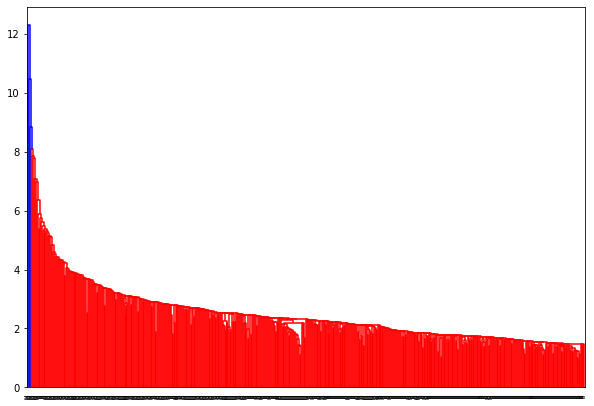

In [ ]:
# Use python function and make dendrogram for single linkage
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, set_link_color_palette
from matplotlib import pyplot as plt

hierarchical_dist = hierarchical_dist.replace({np.nan: 0})
linked_single = linkage(wisc_stand_df, method='single', metric='euclidean')

labelList = hierarchical_dist.index

plt.figure(figsize=(10, 7))
dendrogram(linked_single,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Cut the tree for single linkage
cuttree_single = np.squeeze(cut_tree(linked_single, n_clusters=2))
print(dict(zip(labelList.tolist(), cuttree_single)))

{'B': 0, 'M': 1}


In [ ]:
# Contingency table for single linkage
pd.crosstab(index = wisc_stand_df.index, 
            columns = cuttree_single, 
            rownames = ['Samples'], 
            colnames = ['Cluster'])

Cluster,0,1
Samples,,
B,357,0
M,210,2


In [ ]:
# Cut the tree for single linkage
cuttree_single = np.squeeze(cut_tree(linked_single, n_clusters=5))
print(dict(zip(labelList.tolist(), cuttree_single)))

{'B': 0, 'M': 4}


In [ ]:
# Contingency table for single linkage
pd.crosstab(index = wisc_stand_df.index, 
            columns = cuttree_single, 
            rownames = ['Samples'], 
            colnames = ['Cluster'])

Cluster,0,1,2,3,4
Samples,,,,,
B,356,1,0,0,0
M,209,0,1,1,1


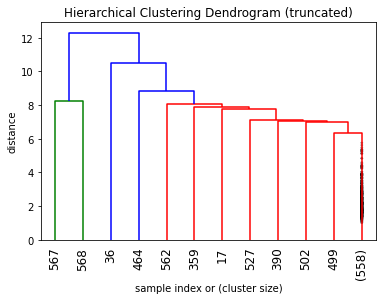

In [ ]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    linked_single,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

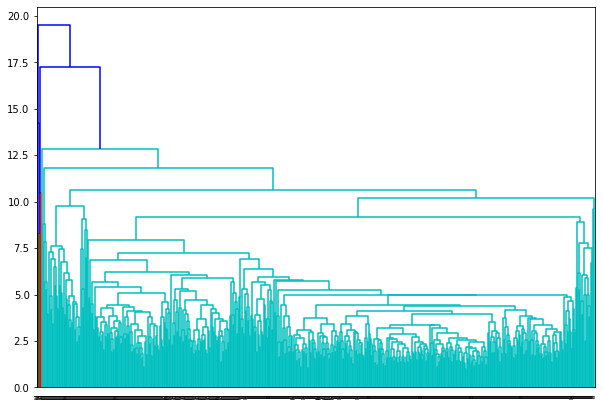

In [ ]:
# Use python function and make dendrogram for average linkage
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, set_link_color_palette
from matplotlib import pyplot as plt

hierarchical_dist = hierarchical_dist.replace({np.nan: 0})
linked_average = linkage(wisc_stand_df, method='average', metric='euclidean')

labelList = hierarchical_dist.index

plt.figure(figsize=(10, 7))
dendrogram(linked_average,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Cut the tree for average linkage
cuttree_average = np.squeeze(cut_tree(linked_average, n_clusters=2))
print(dict(zip(labelList.tolist(), cuttree_average)))

{'B': 0, 'M': 1}


In [ ]:
# Contingency table for average linkage
pd.crosstab(index = wisc_stand_df.index, 
            columns = cuttree_average, 
            rownames = ['Samples'], 
            colnames = ['Cluster'])

Cluster,0,1
Samples,,
B,357,0
M,209,3


In [ ]:
# Cut the tree for average linkage
cuttree_average = np.squeeze(cut_tree(linked_average, n_clusters=5))
print(dict(zip(labelList.tolist(), cuttree_average)))

{'B': 0, 'M': 4}


In [ ]:
# Contingency table for average linkage
pd.crosstab(index = wisc_stand_df.index, 
            columns = cuttree_average, 
            rownames = ['Samples'], 
            colnames = ['Cluster'])

Cluster,0,1,2,3,4
Samples,,,,,
B,355,2,0,0,0
M,208,0,1,1,2


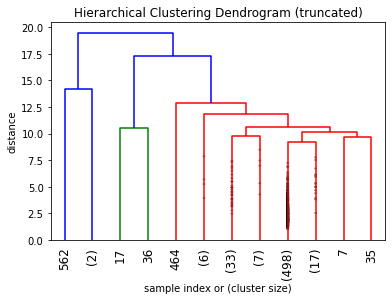

In [ ]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    linked_average,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

The right most cluster already consisted of 35 samples before the last 12 merges.

In [ ]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=2, random_state=0)
clusterer.fit(wisc_stand_df)
clusterer.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
%%capture
!pip install gap-stat

In [ ]:
# Gap statistics
from gap_statistic import OptimalK
optimalK = OptimalK(n_jobs=4, parallel_backend='joblib')
n_clusters = optimalK(wisc_stand_df, cluster_array=np.arange(1, 10))
print(optimalK.gap_df)

   n_clusters  gap_value          gap*  ...           sk*      diff         diff*
0         1.0   1.640448  70968.638095  ...  81948.243145 -0.318667  82027.209612
1         2.0   1.968821  71458.143980  ...  82516.715496 -0.084165  82133.693944
2         3.0   2.059908  68995.684722  ...  79671.234687 -0.022064  79449.072615
3         4.0   2.088033  67562.695665  ...  78016.083558 -0.041724  77790.758851
4         5.0   2.135428  66107.579903  ...  76335.643088 -0.056488  76203.689854
5         6.0   2.198011  65253.677092  ...  75349.787043 -0.006155  75243.635091
6         7.0   2.211520  64563.722434  ...  74553.680432 -0.028823  74505.068615
7         8.0   2.248227  64247.939756  ...  74189.285938 -0.022302  73928.742439
8         9.0   2.277030  62568.489637  ...  72249.292319       NaN           NaN

[9 rows x 8 columns]


None of the dendrograms are clustering the data that well.

##Kmeans

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init="k-means++", n_init=10) #2 clusters for M & B
km_pred=km.fit_predict(wisc_stand_df)

In [ ]:
km_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
wisc_stand_df.shape

(569, 30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'K-Means clustering plot')

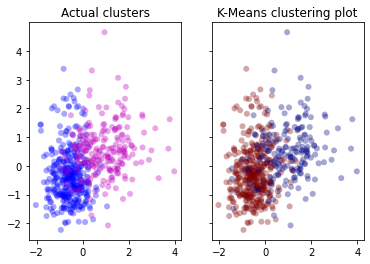

In [ ]:
# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(wisc_stand_df.iloc[:,0], wisc_stand_df.iloc[:,1], c=wisc_df["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(wisc_stand_df.iloc[:,0], wisc_stand_df.iloc[:,1], c=km_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("K-Means clustering plot")

# Random Forest
 

### R version

In [ ]:
# activate R magic to use R in this notebook
# https://ipython.org/ipython-doc/2/config/extensions/rmagic.html
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [ ]:
%%R
#install packages
install.packages("tidyverse")
install.packages("caret",  dependencies = TRUE)
install.packages("psych")
install.packages("corrplot")
install.packages("pROC")


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_1.3.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 712837 bytes (696 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

In [ ]:
%%R
# Load packages
library(caret)
library(tidyverse)
library(psych)
library(corrplot)
library(pROC)

R[write to console]: Loading required package: lattice

R[write to console]: Loading required package: ggplot2

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

R[write to console]: ✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0
✔ purrr   0.3.4     

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()

R[write to console]: 
Attaching package: ‘psych’


R[write to console]: The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


R[write to console]: corrplot 0.84 loaded

R[write to console]: Type 'citation("pROC")' for a citation.

R[write to console]: 
Attaching package: ‘pROC’


R[write to console]: The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [ ]:
#Importing WISC Dataset as a pandas dataframe
url = 'https://raw.githubusercontent.com/rv692/ml2020/main/wisc_data.csv?token=AHSEG2PZVPI3NVZ7TL6XCC273E6WS'

wisc_df_rf = pd.read_csv(url)

In [ ]:
%%R
install.packages("yardstick")
install.packages("ggplot2")

In [ ]:
%%R
library(yardstick)
library(ggplot2)

R[write to console]: For binary classification, the first factor level is assumed to be the event.
Use the argument `event_level = "second"` to alter this as needed.

R[write to console]: 
Attaching package: ‘yardstick’


R[write to console]: The following object is masked from ‘package:readr’:

    spec


R[write to console]: The following objects are masked from ‘package:caret’:

    precision, recall, sensitivity, specificity




In [ ]:
%%R -i wisc_df_rf
head(wisc_df_rf)


In [ ]:
%%R
#Subset into train and test set
#Split data into train and test data. Use 70% of the samples for training data and 30% for testing.

train_size <- floor(0.70 * nrow(wisc_df_rf))
set.seed(543)
train_pos <- sample(seq_len(nrow(wisc_df_rf)), size = train_size)

train_classification <- wisc_df_rf[train_pos, ]
test_classification <- wisc_df_rf[-train_pos, ]

dim(train_classification)
dim(test_classification)



[1] 171  32


In [ ]:
%%R
head(train_classification)



         id diagnosis radius_mean texture_mean perimeter_mean area_mean
358 9013838         M       11.08        18.83          73.30     361.6
98   897137         B       11.25        14.78          71.38     390.0
387  886452         M       13.96        17.05          91.43     602.4
166 9113816         B       12.04        28.14          76.85     449.9
367  868202         M       12.77        22.47          81.72     506.3
478 9110127         M       18.03        16.85         117.50     990.0
    smoothness_mean compactness_mean concavity_mean concave.points_mean
358         0.12160          0.21540      0.1689000            0.063670
98          0.08306          0.04458      0.0009737            0.002941
387         0.10960          0.12790      0.0978900            0.052460
166         0.08752          0.06000      0.0236700            0.023770
367         0.09055          0.05761      0.0471100            0.027040
478         0.08947          0.12320      0.1090000            0

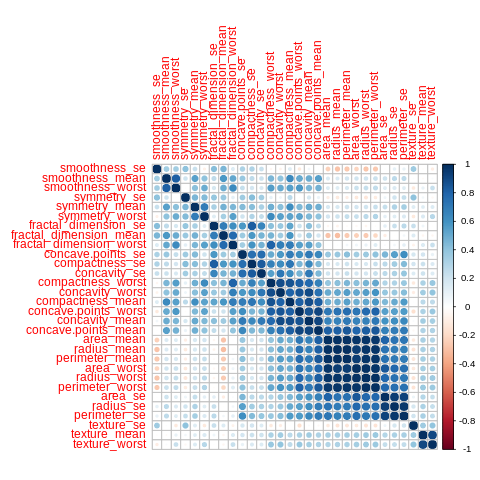

In [ ]:
%%R 
# calculate correlation matrix
cor <- cor(train_classification[,3:32])
corrplot(cor, order = "hclust")

In [ ]:
%%R 
#Calculate feautures with correlation higher than 0.7
Corfeatures <- colnames(train_classification[ , 3:32])[findCorrelation(cor, cutoff = 0.7, verbose = TRUE)]


Compare row 7  and column  8 with corr  0.916 
  Means:  0.568 vs 0.394 so flagging column 7 
Compare row 8  and column  28 with corr  0.911 
  Means:  0.542 vs 0.382 so flagging column 8 
Compare row 28  and column  6 with corr  0.816 
  Means:  0.525 vs 0.371 so flagging column 28 
Compare row 6  and column  27 with corr  0.803 
  Means:  0.515 vs 0.361 so flagging column 6 
Compare row 27  and column  26 with corr  0.888 
  Means:  0.458 vs 0.349 so flagging column 27 
Compare row 23  and column  21 with corr  0.993 
  Means:  0.464 vs 0.34 so flagging column 23 
Compare row 21  and column  3 with corr  0.974 
  Means:  0.429 vs 0.33 so flagging column 21 
Compare row 26  and column  30 with corr  0.808 
  Means:  0.416 vs 0.326 so flagging column 26 
Compare row 3  and column  24 with corr  0.946 
  Means:  0.39 vs 0.313 so flagging column 3 
Compare row 24  and column  1 with corr  0.946 
  Means:  0.365 vs 0.307 so flagging column 24 
Compare row 1  and column  4 with corr  0.987

In [ ]:
%%R 
Corfeatures

 [1] "concavity_mean"          "concave.points_mean"    
 [3] "concave.points_worst"    "compactness_mean"       
 [5] "concavity_worst"         "perimeter_worst"        
 [7] "radius_worst"            "compactness_worst"      
 [9] "perimeter_mean"          "area_worst"             
[11] "radius_mean"             "perimeter_se"           
[13] "concave.points_se"       "radius_se"              
[15] "area_se"                 "compactness_se"         
[17] "fractal_dimension_worst" "smoothness_mean"        
[19] "texture_mean"           


19 feautures are flagged for removal

In [ ]:
%%R 
#Subset to remove features with a correlation lower than 0.7
wisc_data_cor <- train_classification[, which(!colnames(train_classification) %in% Corfeatures)]

In [ ]:
%%R 
#Tran random forest model all samples
set.seed(253)
model_rf_all <- train(diagnosis ~ .,
                           data = train_classification,
                           method = "rf",
                           preProcess = c("scale", "center"),
                           trControl = trainControl(method = "repeatedcv", number = 5, repeats = 10, verboseIter = FALSE))

In [ ]:
%%R 
model_rf_all

Random Forest 

398 samples
 31 predictor
  2 classes: 'B', 'M' 

Pre-processing: scaled (31), centered (31) 
Resampling: Cross-Validated (5 fold, repeated 10 times) 
Summary of sample sizes: 318, 320, 318, 318, 318, 318, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9492581  0.8906544
  16    0.9467357  0.8859980
  31    0.9429541  0.8781358

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


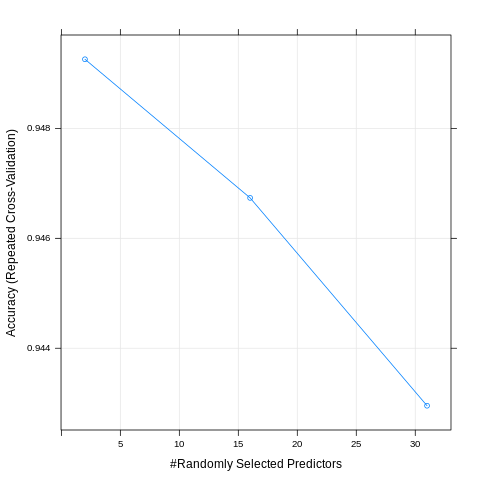

In [ ]:
%%R 
#Plot model
plot(model_rf_all)

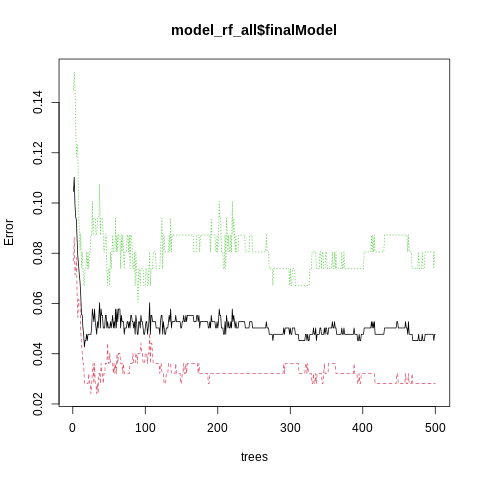

In [ ]:
%%R 
#Plot final model
plot(model_rf_all$finalModel)

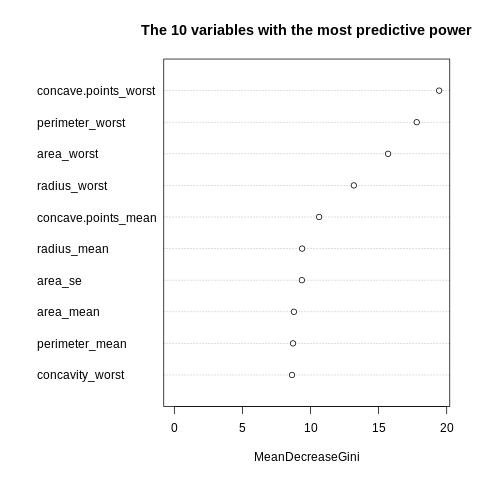

In [ ]:
%%R 
#Plot most predictive feautures
randomForest::varImpPlot(model_rf_all$finalModel, sort = TRUE, 
           n.var = 10, main = "The 10 variables with the most predictive power")

In [ ]:
%%R
#Calculate predict
ypredall= predict(model_rf_all, test_classification)
ypredall

  [1] B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B
 [38] B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B
 [75] B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B M B M M
[112] M M M M M M B M M B M M M M M M M M M M M M M M M M M M M M M M M M M M M
[149] M M M M M M M M M M M M M M M M M M M M M M M
Levels: B M


In [ ]:
%%R
#Prepare confusion matrix
confusionmatrixall <- confusionMatrix(table(ypredall, test_classification$diagnosis))
confusionmatrixall

Confusion Matrix and Statistics

        
ypredall   B   M
       B 107   3
       M   1  60
                                          
               Accuracy : 0.9766          
                 95% CI : (0.9412, 0.9936)
    No Information Rate : 0.6316          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9494          
                                          
 Mcnemar's Test P-Value : 0.6171          
                                          
            Sensitivity : 0.9907          
            Specificity : 0.9524          
         Pos Pred Value : 0.9727          
         Neg Pred Value : 0.9836          
             Prevalence : 0.6316          
         Detection Rate : 0.6257          
   Detection Prevalence : 0.6433          
      Balanced Accuracy : 0.9716          
                                          
       'Positive' Class : B               
                                          


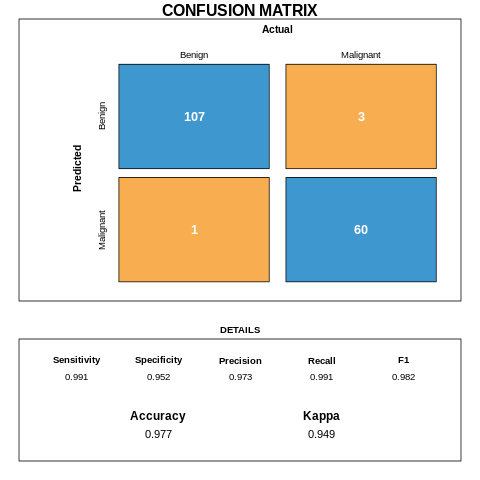

In [ ]:
%%R
draw_confusion_matrix <- function(confusionmatrixall) {

  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)

  # create the matrix 
  rect(150, 430, 240, 370, col='#3F97D0')
  text(195, 435, 'Benign', cex=1.2)
  rect(250, 430, 340, 370, col='#F7AD50')
  text(295, 435, 'Malignant', cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col='#F7AD50')
  rect(250, 305, 340, 365, col='#3F97D0')
  text(140, 400, 'Benign', cex=1.2, srt=90)
  text(140, 335, 'Malignant', cex=1.2, srt=90)

  # add in the cm results 
  res <- as.numeric(confusionmatrixall$table)
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(confusionmatrixall$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(confusionmatrixall$byClass[1]), 3), cex=1.2)
  text(30, 85, names(confusionmatrixall$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(confusionmatrixall$byClass[2]), 3), cex=1.2)
  text(50, 85, names(confusionmatrixall$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(confusionmatrixall$byClass[5]), 3), cex=1.2)
  text(70, 85, names(confusionmatrixall$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(confusionmatrixall$byClass[6]), 3), cex=1.2)
  text(90, 85, names(confusionmatrixall$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(confusionmatrixall$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(confusionmatrixall$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(confusionmatrixall$overall[1]), 3), cex=1.4)
  text(70, 35, names(confusionmatrixall$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(confusionmatrixall$overall[2]), 3), cex=1.4)
}  

draw_confusion_matrix(confusionmatrixall)


In [ ]:
%%R
#Calculate predict prpbability
ypredall2= predict(model_rf_all, test_classification, type="prob")
ypredall2

R[write to console]: Setting levels: control = B, case = M

R[write to console]: Setting direction: controls > cases



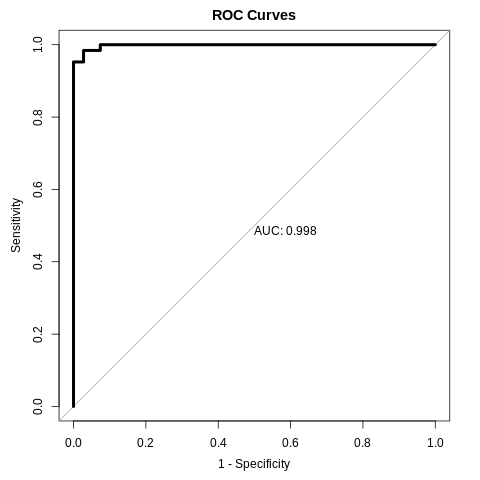

In [ ]:
%%R
rf_ROC <- roc(test_classification$diagnosis,ypredall2$B,plot=TRUE,print.auc=TRUE,lwd =4,legacy.axes=TRUE,main="ROC Curves")


In [ ]:
%%R 
#Train random forest model without higly correlated features
set.seed(253)
model_rf_cor <- train(diagnosis ~ .,
                           data = wisc_data_cor,
                           method = "rf",
                           preProcess = c("scale", "center"),
                           trControl = trainControl(method = "repeatedcv", number = 5, repeats = 10, verboseIter = FALSE))

In [ ]:
%%R
model_rf_cor


Random Forest 

398 samples
 12 predictor
  2 classes: 'B', 'M' 

Pre-processing: scaled (12), centered (12) 
Resampling: Cross-Validated (5 fold, repeated 10 times) 
Summary of sample sizes: 318, 320, 318, 318, 318, 318, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9510432  0.8944105
   7    0.9407328  0.8720300
  12    0.9284253  0.8455508

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


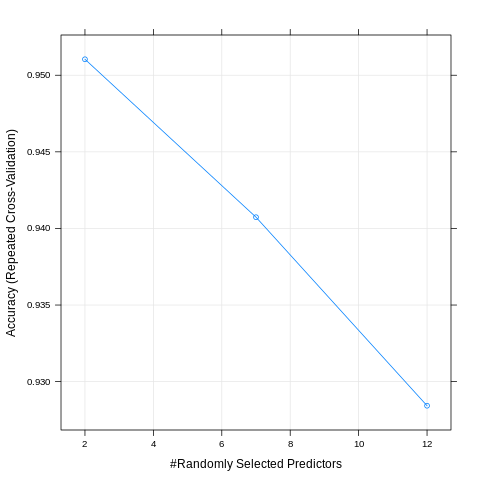

In [ ]:
%%R 
#Plot model
plot(model_rf_cor)

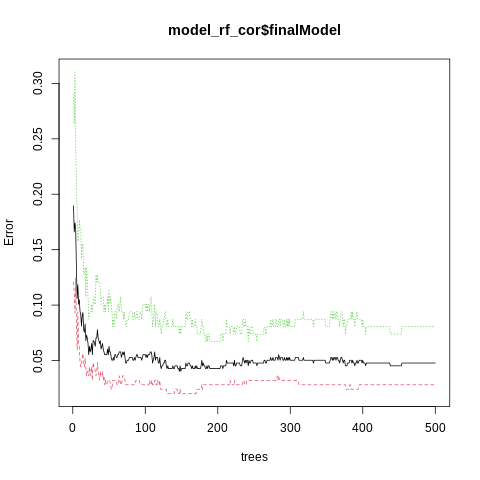

In [ ]:
%%R 
#Plot final model
plot(model_rf_cor$finalModel)

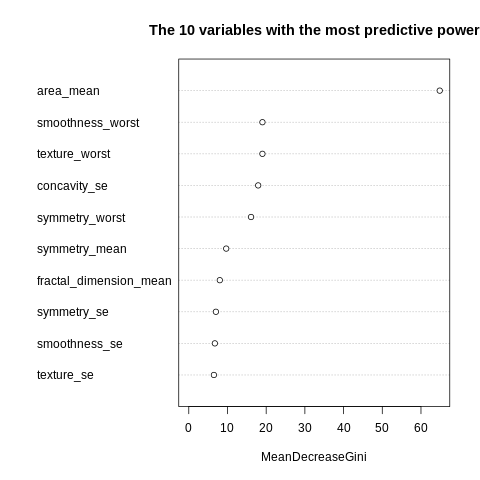

In [ ]:
%%R 
#Plot most predictive feautures
randomForest::varImpPlot(model_rf_cor$finalModel, sort = TRUE, 
           n.var = 10, main = "The 10 variables with the most predictive power")

In [ ]:
%%R
#Calculate predict
ypredcor= predict(model_rf_cor, test_classification)
ypredcor

  [1] B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B
 [38] B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B B
 [75] B B B B B B B M B M B B B B B B B B B B B B B B B B B B B B B B B B B M M
[112] M M M M M M B M M B M M M M M M M M M M M M M M M M M M M M M M M M M M M
[149] M M M M M M M M M M M M M M M M M M M M M M M
Levels: B M


In [ ]:
%%R
#Prepare confusion matrix
confusionmatrixcor <- confusionMatrix(table(ypredcor, test_classification$diagnosis))
confusionmatrixcor

Confusion Matrix and Statistics

        
ypredcor   B   M
       B 106   3
       M   2  60
                                          
               Accuracy : 0.9708          
                 95% CI : (0.9331, 0.9904)
    No Information Rate : 0.6316          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.937           
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9815          
            Specificity : 0.9524          
         Pos Pred Value : 0.9725          
         Neg Pred Value : 0.9677          
             Prevalence : 0.6316          
         Detection Rate : 0.6199          
   Detection Prevalence : 0.6374          
      Balanced Accuracy : 0.9669          
                                          
       'Positive' Class : B               
                                          


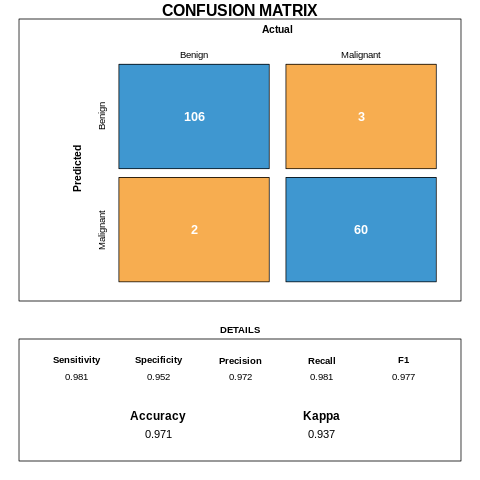

In [ ]:
%%R
draw_confusion_matrix <- function(confusionmatrixcor) {

  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)

  # create the matrix 
  rect(150, 430, 240, 370, col='#3F97D0')
  text(195, 435, 'Benign', cex=1.2)
  rect(250, 430, 340, 370, col='#F7AD50')
  text(295, 435, 'Malignant', cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col='#F7AD50')
  rect(250, 305, 340, 365, col='#3F97D0')
  text(140, 400, 'Benign', cex=1.2, srt=90)
  text(140, 335, 'Malignant', cex=1.2, srt=90)

  # add in the cm results 
  res <- as.numeric(confusionmatrixcor$table)
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(confusionmatrixcor$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(confusionmatrixcor$byClass[1]), 3), cex=1.2)
  text(30, 85, names(confusionmatrixcor$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(confusionmatrixcor$byClass[2]), 3), cex=1.2)
  text(50, 85, names(confusionmatrixcor$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(confusionmatrixcor$byClass[5]), 3), cex=1.2)
  text(70, 85, names(confusionmatrixcor$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(confusionmatrixcor$byClass[6]), 3), cex=1.2)
  text(90, 85, names(confusionmatrixcor$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(confusionmatrixcor$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(confusionmatrixcor$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(confusionmatrixcor$overall[1]), 3), cex=1.4)
  text(70, 35, names(confusionmatrixcor$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(confusionmatrixcor$overall[2]), 3), cex=1.4)
}  

draw_confusion_matrix(confusionmatrixcor)

In [ ]:
%%R
#Calculate predict
ypredcor2= predict(model_rf_cor, test_classification, type="prob")
ypredcor2

R[write to console]: Setting levels: control = B, case = M

R[write to console]: Setting direction: controls > cases



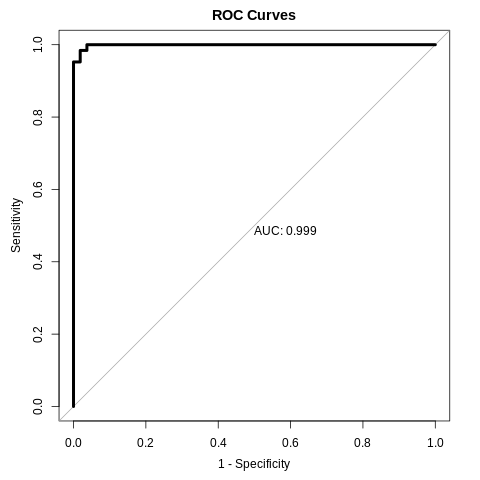

In [ ]:
%%R
rf_ROC2 <- roc(test_classification$diagnosis,ypredcor2$B,plot=TRUE,print.auc=TRUE,lwd =4,legacy.axes=TRUE,main="ROC Curves")

R[write to console]: Setting levels: control = B, case = M

R[write to console]: Setting direction: controls < cases



Area under the curve: 0.9988


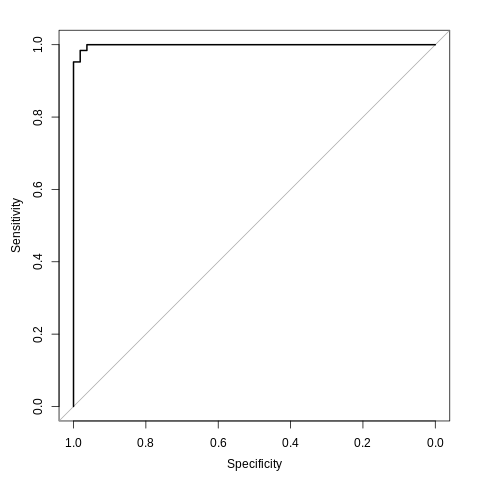

In [ ]:
%%R
#Calculate ROC AUC
rf.roc<-roc(test_classification$diagnosis,ypredcor2$M)
plot(rf.roc)
auc(rf.roc)